### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Functions

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

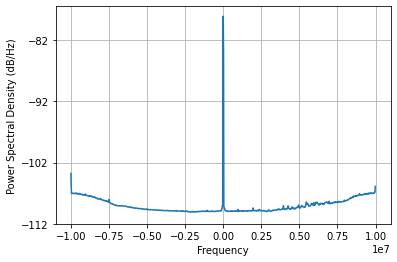

In [4]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/audio-recording.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

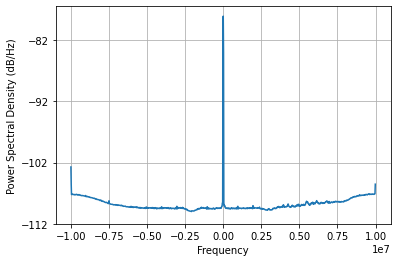

In [5]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/camera-photo.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

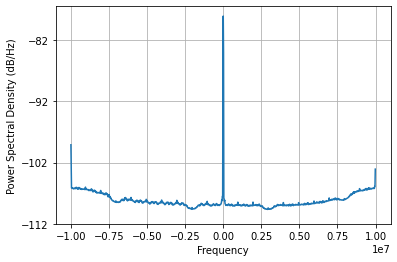

In [6]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/camera-video.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

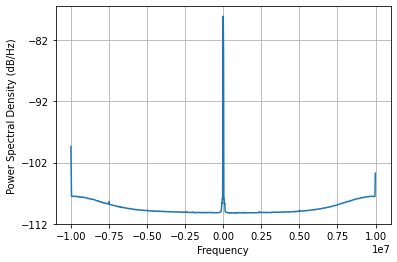

In [7]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/email-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

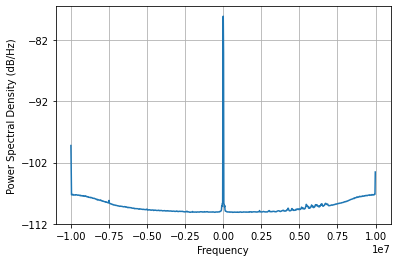

In [8]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/gallary-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

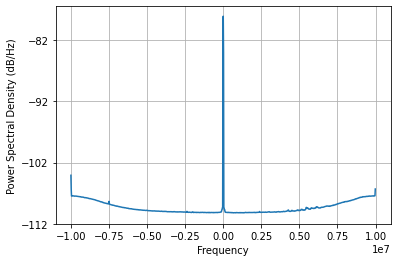

In [9]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/home-screen.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

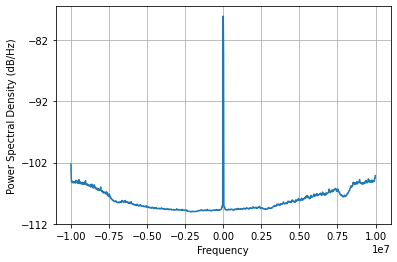

In [10]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/idle.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

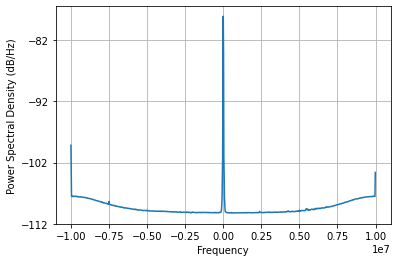

In [11]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/phone-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

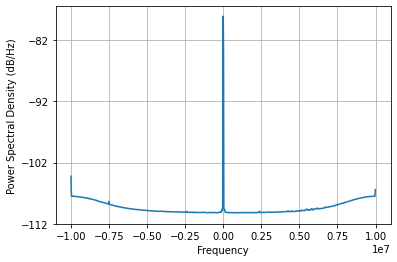

In [12]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/sms-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

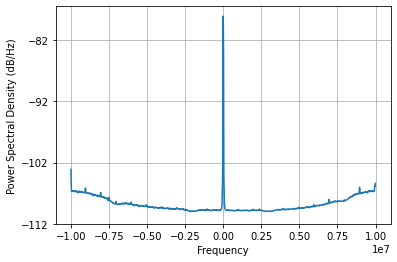

In [13]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/web-browser-app.cfile")
fig = plt.figure()
plt.psd(data, NFFT=1024, Fs=20e6)
plt.show()
del data

### Loading an EM Trace and Plotting

#### Settings:

In [3]:
# number of samples per class
num_samp_per_class = 20000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
#labels = ["audio-recording", "camera-photo", "camera-video", "email-app", "gallary-app"
#          , "home-screen", "idle", "phone-app", "sms-app", "web-browser-app"]

#labels = ["camera-video", "home-screen", "idle", "web-browser-app"]

labels = ["audio-recording", "camera-video", "idle", "web-browser-app"]

#### Preparing the Data of Class 0

In [5]:
class_label = 0
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/audio-recording.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)


X = Zxx[:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
57494
(2048, 57494)
[0.02571448 0.01478624 0.00671951 ... 0.00635793 0.00530792 0.01663368]
(20000, 2048)
(20000,)


#### Preparing the Data of Class 1

In [6]:
class_label = 1
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/camera-video.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()


Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)


X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
46156
(2048, 46156)
[0.02941988 0.01955969 0.01029977 ... 0.01259677 0.01193148 0.02089768]
(40000, 2048)
(40000,)


#### Preparing the Data of Class 2

In [7]:
class_label = 2
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/idle.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
48350
(2048, 48350)
[0.02675777 0.01629437 0.00629983 ... 0.00732477 0.00657164 0.01615628]
(60000, 2048)
(60000,)


#### Preparing the Data of Class 3

In [8]:
class_label = 3
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/web-browser-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)


X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
45132
(2048, 45132)
[0.02547047 0.01472573 0.00687456 ... 0.0061577  0.0069259  0.01450491]
(80000, 2048)
(80000,)


#### Preparing the Data of Class 4

In [21]:
class_label = 4
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/gallary-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
51787
(2048, 51787)
[0.02344334 0.0130849  0.00467426 ... 0.00269229 0.00462073 0.0135582 ]
(100000, 2048)
(100000,)


#### Preparing the Data of Class 5

In [22]:
class_label = 5
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/home-screen.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
57494
(2048, 57494)
[0.02283014 0.01204539 0.00465576 ... 0.00229056 0.00464427 0.01280882]
(120000, 2048)
(120000,)


#### Preparing the Data of Class 6

In [23]:
class_label = 6
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/idle.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
48350
(2048, 48350)
[0.02675777 0.01629437 0.00629983 ... 0.00732477 0.00657164 0.01615628]
(140000, 2048)
(140000,)


#### Preparing the Data of Class 7

In [24]:
class_label = 7
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/phone-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
36280
(2048, 36280)


KeyboardInterrupt: 

#### Preparing the Data of Class 8

In [ ]:
class_label = 8
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/sms-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

#### Preparing the Data of Class 9

In [ ]:
class_label = 9
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/web-browser-app.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)
del data
Zxx = Zxx.transpose()

Zxx = abs(Zxx)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(Zxx)
print(scaler.data_max_)
Zxx = scaler.transform(Zxx)

X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
#X = Zxx[:num_samp_per_class]
#y = np.full(num_samp_per_class, class_label)
del Zxx
print(X.shape)
print(y.shape)

### Building the Model

In [9]:
#X = abs(X)

# scaling the features (only real part of the data can be used)
#scaler = MinMaxScaler()
#scaler.fit(X)
#print(scaler.data_max_)
#X = scaler.transform(X)

In [10]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
#model.add(keras.layers.Input(shape=(100,)))

model.add(keras.layers.Dense(1400, activation="relu"))

model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#model.add(keras.layers.Dense(4, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1400)              2868600   
_________________________________________________________________
dense_1 (Dense)              (None, 800)               1120800   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5

In [12]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [13]:
#history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
#history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

checkpoint_cb = keras.callbacks.ModelCheckpoint("./3.GalaxyGrandPrime-Analysis-4-Classes.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/10
2025/2025 [==============================] - 44s 22ms/step - loss: 1.8466 - accuracy: 0.2585 - val_loss: 1.3731 - val_accuracy: 0.5000
Epoch 2/10
2025/2025 [==============================] - 45s 22ms/step - loss: 1.1873 - accuracy: 0.6931 - val_loss: 0.9154 - val_accuracy: 0.9954
Epoch 3/10
2025/2025 [==============================] - 45s 22ms/step - loss: 0.5146 - accuracy: 0.9946 - val_loss: 0.1870 - val_accuracy: 0.9974
Epoch 4/10
2025/2025 [==============================] - 43s 21ms/step - loss: 0.1125 - accuracy: 0.9951 - val_loss: 0.0596 - val_accuracy: 0.9976
Epoch 5/10
2025/2025 [==============================] - 45s 22ms/step - loss: 0.0597 - accuracy: 0.9958 - val_loss: 0.0428 - val_accuracy: 0.9981
Epoch 6/10
2025/2025 [==============================] - 46s 23ms/step - loss: 0.0496 - accuracy: 0.9964 - val_loss: 0.0378 - val_accuracy: 0.9979
Epoch 7/10
2025/2025 [==============================] - 45s 22ms/step - loss: 0.0453 - accuracy: 0.9965 - val_loss: 0.0344 -

### Plotting

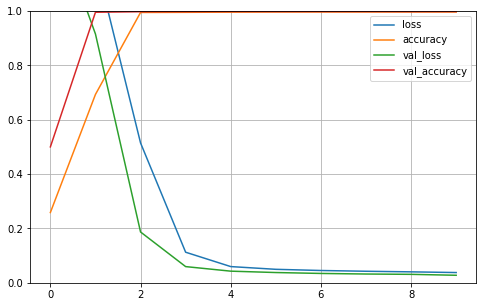

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Testing the Model

In [15]:
model = keras.models.load_model("./3.GalaxyGrandPrime-Analysis-4-Classes.h5")
#model = keras.models.load_model("./4.Nokia-4.2-Analysis-4-Classes.h5")

In [16]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 2s 8ms/step - loss: 0.0339 - accuracy: 0.2426
test loss, test acc: [0.0339452289044857, 0.24262499809265137]


In [17]:
#y_pred = model.predict(X_test)
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
print(y_pred)

[0 0 1 ... 3 2 3]


In [19]:
print(y_pred[0])

0


In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1924    2    0    0]
 [   0 1955    0    0]
 [  17    1 2074    4]
 [   0    4    0 2019]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1926
           1       1.00      1.00      1.00      1955
           2       1.00      0.99      0.99      2096
           3       1.00      1.00      1.00      2023

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



### Saving the Model

In [ ]:
#model.save("./4.Nokia-4.2-Analysis-4-Classes.h5")